In [6]:
import Graphics.Color.Demo
import Graphics.Color.Space
import Graphics.Image as I
:set -XDataKinds
:set -XTypeApplications
:set -XPartialTypeSignatures

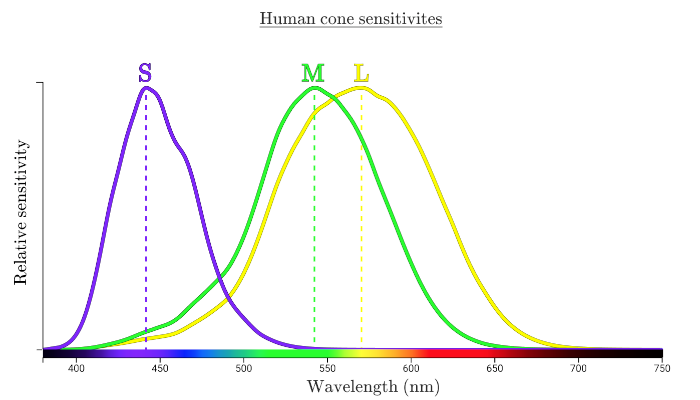

In [2]:
display . I.scale Bilinear Edge (0.5, 0.5) =<< I.readImageRGB "files/LMS.png"

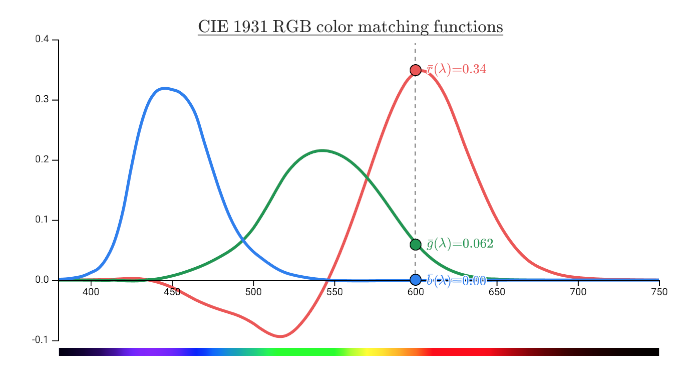

In [16]:
display . I.scale Bilinear Edge (0.5, 0.5) =<< I.readImageRGB "files/CIERGB.png"

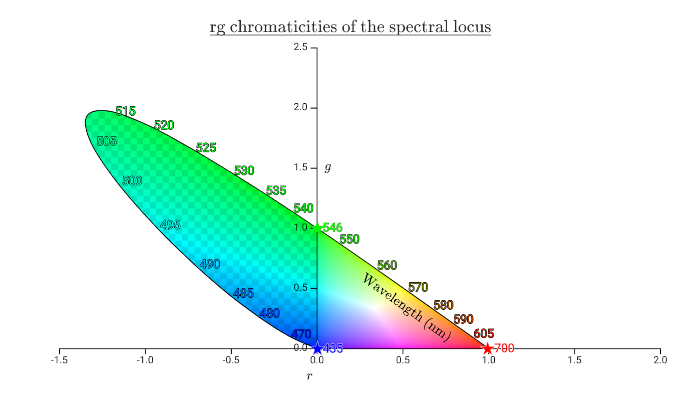

In [20]:
display . I.scale Bilinear Edge (0.5, 0.5) =<< I.readImageRGB "files/CIERGB-spectral-locus.png"

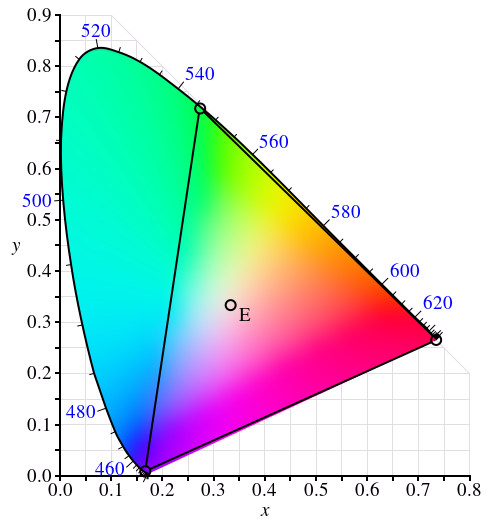

In [3]:
display =<< I.readImageRGB "files/CIERGB-gamut.jpg"

In [7]:
import Graphics.Color.Illuminant.CIE1931
import qualified Graphics.Color.Space.CIE1931.RGB as CIE
cieGamut = gamut :: Gamut CIE.CIERGB _ Double
cieGamut
:t gamut

Gamut:
  Red:   Chromaticity {chromaticityCIExyY = <CIExyY CIE1931 'E:( 0.7347428400059980, 0.2652571599940020)>}
  Green: Chromaticity {chromaticityCIExyY = <CIExyY CIE1931 'E:( 0.2737790338249580, 0.7174777002561160)>}
  Blue:  Chromaticity {chromaticityCIExyY = <CIExyY CIE1931 'E:( 0.1665556295802800, 0.0089107261825450)>}

gamut :: forall (cs :: Linearity -> *) i e. (RedGreenBlue cs i, RealFloat e) => Gamut cs i e

In [11]:
gamutWhitePoint cieGamut

WhitePoint (Chromaticity {chromaticityCIExyY = <CIExyY CIE1931 'E:( 0.33333334, 0.33333334)>})

In [37]:
convertColor (chromaticityCIExyY (primaryChromaticity (gamutRedPrimary cieGamut))) :: Color (CIE.CIERGB 'Linear) Double
convertColor (chromaticityCIExyY (primaryChromaticity (gamutGreenPrimary cieGamut))) :: Color (CIE.CIERGB 'Linear) Double
convertColor (chromaticityCIExyY (primaryChromaticity (gamutBluePrimary cieGamut))) :: Color (CIE.CIERGB 'Linear) Double

-- :: Color (CIERGB 'Linear) Float

<CIERGB 'Linear:( 5.6529112492933940, 0.0000000000000000, 0.0000000000000000)>

<CIERGB 'Linear:(-0.0000000000000002, 1.2309207287050716,-0.0000000000000000)>

<CIERGB 'Linear:( 0.0000000000000000,-0.0000000000000018,93.4579439252332800)>

In [39]:
putStrLn $ "The line " <> replicate 120 '-'

The line ------------------------------------------------------------------------------------------------------------------------

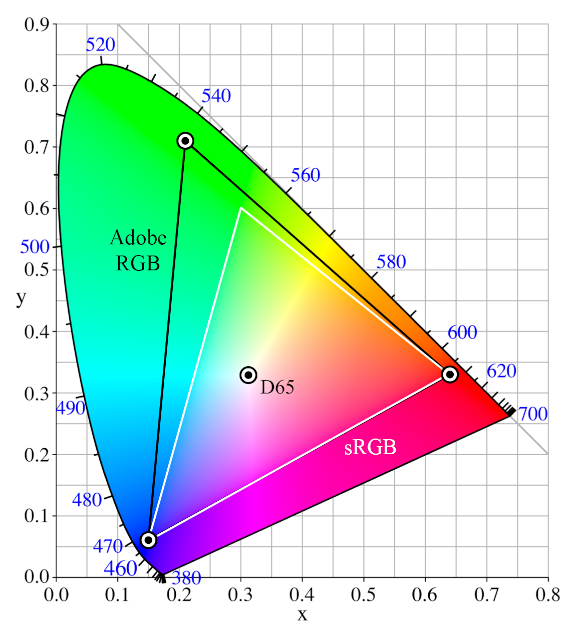

In [3]:
display . I.scale Bilinear Edge (0.5, 0.5) =<< I.readImageRGB "files/CIExy1931_AdobeRGB_vs_sRGB.png"

In [13]:
import Graphics.Color.Space.RGB.AdobeRGB
print (gamut :: Gamut SRGB D65 Float)
print (gamut :: Gamut AdobeRGB D65 Float)

Gamut:
  Red:   Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.64000000, 0.33000000)>}
  Green: Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.30000000, 0.60000000)>}
  Blue:  Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.15000000, 0.06000000)>}

Gamut:
  Red:   Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.64000000, 0.33000000)>}
  Green: Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.21000000, 0.71000000)>}
  Blue:  Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.15000000, 0.06000000)>}

In [25]:
print (colorTemperature :: CCT D65)
print (whitePoint :: WhitePoint D65 Float)

CCT {unCCT = 6504.0}

WhitePoint (Chromaticity {chromaticityCIExyY = <CIExyY * D65:( 0.31270000, 0.32900000)>})

<SRGB 'NonLinear:( 0.10000000, 0.90000000, 0.20000000)>

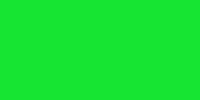

In [58]:
sRGB = ColorRGB 0.1 0.9 0.2 :: Color (SRGB 'NonLinear) Float
sRGB
displayColor sRGB

In [59]:
convertColor sRGB :: Color (AdobeRGB 'NonLinear) Float
:t convertColor

<AdobeRGB 'NonLinear:( 0.51410306, 0.89703953, 0.28683590)>

convertColor :: forall cs' i e cs. (ColorSpace cs' i e, ColorSpace cs i e) => Color cs' e -> Color cs e

In [60]:
-- unwrap `convertColor`
adobeRGB = (ecctf :: Color (AdobeRGB 'Linear) Float -> Color (AdobeRGB 'NonLinear) Float) -- Encoding color component transfer function
         . (inpmApply inpm :: Color (XYZ D65) Float -> Color (AdobeRGB 'Linear) Float) -- Inverse normalized primary matrix
         . (npmApply npm :: Color (SRGB 'Linear) Float -> Color (XYZ D65) Float) -- Normalized primary matrix
         . (dcctf :: Color (SRGB 'NonLinear) Float -> Color (SRGB 'Linear) Float) -- Decoding color component transfer function
         $ sRGB
sRGB
adobeRGB

<SRGB 'NonLinear:( 0.10000000, 0.90000000, 0.20000000)>

<AdobeRGB 'NonLinear:( 0.51410300, 0.89703960, 0.28683585)>

In [61]:
convertColor sRGB :: Color (XYZ D65) Float

<XYZ * D65:( 0.29168743, 0.56767830, 0.12551907)>

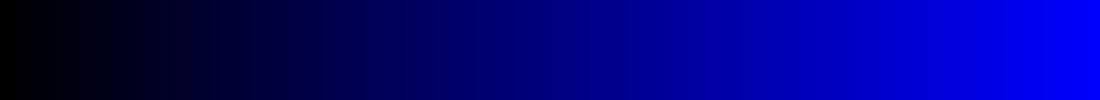

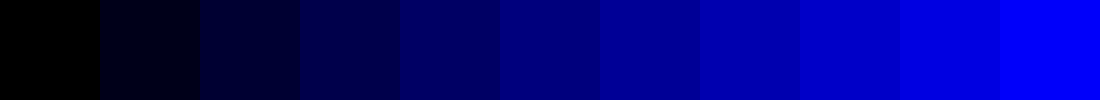

In [84]:
makeImage (Sz2 100 1100) (\(_ :. j) -> PixelRGB 0 0 (fromIntegral ((255 * j) `div` 1100)) :: Pixel (SRGB 'NonLinear) Word8)
foldl1 leftToRight [makeImage (Sz 100) $ const (PixelRGB 0 0 (25 * i) :: Pixel (SRGB 'NonLinear) Word8 ) | i <- [0 :: Word8 .. 10]]

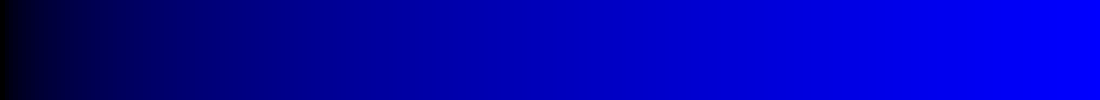

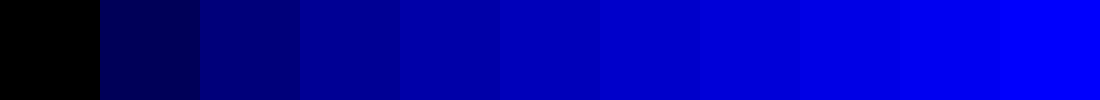

In [87]:
makeImage (Sz2 100 1100) (\(_ :. j) -> PixelRGB 0 0 (fromIntegral ((255 * j) `div` 1100)) :: Pixel (SRGB 'Linear) Word8)
foldl1 leftToRight [makeImage (Sz 100) $ const (PixelRGB 0 0 (25 * i) :: Pixel (SRGB 'Linear) Word8) | i <- [0 :: Word8 .. 10]]

In [98]:
:t npm 
print (inpm :: INPM SRGB Float)
print (npm :: NPM SRGB Float)
-- https://en.wikipedia.org/wiki/SRGB#Specification_of_the_transformation

npm :: forall (cs :: Linearity -> *) i a. (RedGreenBlue cs i, ColorSpace (cs 'Linear) i a, RealFloat a) => NPM cs a

[ [ 0.41240000, 0.35760000, 0.18050000 ]
, [ 0.21260000, 0.71520000, 0.07220000 ]
, [ 0.01930000, 0.11920000, 0.95050000 ] ]

[ [ 3.24060000,-1.53720000,-0.49860000 ]
, [-0.96890000, 1.87580000, 0.04150000 ]
, [ 0.05570000,-0.20400000, 1.05700000 ] ]

In [107]:
:! xdg-open https://en.wikipedia.org/wiki/SRGB#Specification_of_the_transformation

Found ffmpeg: /usr/lib/chromium-browser/libffmpeg.so
	avcodec: 3819108
	avformat: 3810917
	avutil: 3680612
Ffmpeg version is OK! Let's use it.
[29367:29367:0622/173356.189174:ERROR:isolated_origin_util.cc(71)] Ignoring port number in isolated origin: chrome://custo
Opening in existing browser session.

In [109]:
import qualified Graphics.Color.Space.RGB.Derived.SRGB as Derived
import qualified Graphics.Color.Illuminant.Wikipedia as W
print (inpm :: INPM (Derived.SRGB D65) Float)
print (npm :: NPM (Derived.SRGB D65) Float)

[ [ 3.24096940,-1.53738300,-0.49861073 ]
, [-0.96924350, 1.87596710, 0.04155508 ]
, [ 0.05563003,-0.20397685, 1.05697140 ] ]

[ [ 0.41239083, 0.35758436, 0.18048080 ]
, [ 0.21263903, 0.71516870, 0.07219231 ]
, [ 0.01933082, 0.11919474, 0.95053214 ] ]

In [112]:
sRGB
convertColor sRGB :: Color (Derived.SRGB D65 'NonLinear) Float

<SRGB 'NonLinear:( 0.10000000, 0.90000000, 0.20000000)>

<SRGB * D65 'NonLinear:( 0.10002098, 0.90001690, 0.19999556)>